# Dataset

In [1]:
!wget https://raw.githubusercontent.com/rmarcacini/text-collections/master/complete_texts_csvs/re8.csv

--2023-01-06 19:25:37--  https://raw.githubusercontent.com/rmarcacini/text-collections/master/complete_texts_csvs/re8.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 4649304 (4.4M) [text/plain]
Saving to: ‘re8.csv’

re8.csv             100%[===================>]   4.43M  --.-KB/s    in 0.01s   

2023-01-06 19:25:37 (314 MB/s) - ‘re8.csv’ saved [4649304/4649304]



In [2]:
!pip install git+https://github.com/AlvaroJoseLopes/Deep-Walk-Transformers.git
!pip install tqdm

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Cloning https://github.com/AlvaroJoseLopes/Deep-Walk-Transformers.git to /tmp/pip-req-build-xrybzs01
  Running command git clone --filter=blob:none --quiet https://github.com/AlvaroJoseLopes/Deep-Walk-Transformers.git /tmp/pip-req-build-xrybzs01
  Resolved https://github.com/AlvaroJoseLopes/Deep-Walk-Transformers.git to commit 4d82df9e83ee15e66a50df6d33c4be9ecca0ed37
  Preparing metadata (setup.py) ... done
  Cloning https://github.com/AlvaroJoseLopes/graph-walker to /tmp/pip-install-tq5kuev9/graph-walker_b40b0b7302ea43e4b306be26a6f10dfa
  Running command git clone --filter=blob:none --quiet https://github.com/AlvaroJoseLopes/graph-walker /tmp/pip-install-tq5kuev9/graph-walker_b40b0b7302ea43e4b306be26a6f10dfa
  Resolved https://github.com/AlvaroJoseLopes/graph-walker to commit b8710bc3bb4daa8212fef1d9c12a1451e5dd56c6
  Installing build dependencies ... done
  Getting requirements to bui

In [3]:
from sklearn.cluster import KMeans
import numpy as np
from sklearn.metrics.cluster import normalized_mutual_info_score
from sklearn.svm import LinearSVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
import numpy as np
from sklearn.manifold import TSNE
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt

def evaluate(df_embed, labels):
    # avaliando com clustering
    # kmeans = KMeans(n_clusters=len(np.unique(labels)), random_state=0).fit(df_emb_train)
    # kmeans.labels_
    # print('---> DeepWalk Transformers (clustering): ', normalized_mutual_info_score(kmeans.labels_, labels))

    # avaliando com classificacao
    print("\n\n\n---> DeepWalk Transformers (classification)")
    clf_train, clf_test, clf_train_y, clf_test_y  = train_test_split(df_embed, labels, test_size=0.3, random_state=42)
    clf = LinearSVC()
    clf.fit(clf_train, clf_train_y)
    print(classification_report(clf_test_y, clf.predict(clf_test)))

In [4]:
import pandas as pd 

df = pd.read_csv('re8.csv')
df

,file_name,text,class
0,acq.4342.txt,mcdowell me to merger with interpharm inc mcdo...,acq
1,acq.5302.txt,intermagnetics general inma completes buy inte...,acq
2,acq.8530.txt,tesco extends hillards offer tesco plc tsco l ...,acq
3,acq.3841.txt,healthvest hvt sells shares healthvest a maryl...,acq
4,acq.6302.txt,cooper canada said it received takeover offers...,acq
...,...,...,...
7669,trade.1829.txt,japan will not retaliate now against u s tarif...,trade
7670,trade.4403.txt,koreans to buy billion dlrs in u s goods south...,trade
7671,trade.6944.txt,belgolux trade swings into january deficit the...,trade
7672,trade.7420.txt,nakasone to visit washington in late april pri...,trade


In [5]:
df['label'] = df['class'].astype('category').cat.codes
df

,file_name,text,class,label
0,acq.4342.txt,mcdowell me to merger with interpharm inc mcdo...,acq,0
1,acq.5302.txt,intermagnetics general inma completes buy inte...,acq,0
2,acq.8530.txt,tesco extends hillards offer tesco plc tsco l ...,acq,0
3,acq.3841.txt,healthvest hvt sells shares healthvest a maryl...,acq,0
4,acq.6302.txt,cooper canada said it received takeover offers...,acq,0
...,...,...,...,...
7669,trade.1829.txt,japan will not retaliate now against u s tarif...,trade,7
7670,trade.4403.txt,koreans to buy billion dlrs in u s goods south...,trade,7
7671,trade.6944.txt,belgolux trade swings into january deficit the...,trade,7
7672,trade.7420.txt,nakasone to visit washington in late april pri...,trade,7


In [6]:
df = df.sample(frac=1).reset_index(drop=True)
df

,file_name,text,class,label
0,earn.1744.txt,otter tail power co ottr o sets dividend qtly ...,earn,2
1,acq.6566.txt,ic inds icx to sell certain assets to mlx ic i...,acq,0
2,earn.7913.txt,cellular communications inc comm nine mths dec...,earn,2
3,ship.4877.txt,turkish ship headed for florida after explosio...,ship,6
4,earn.3577.txt,anitec image technology corp antc nd qtr net s...,earn,2
...,...,...,...,...
7669,acq.4091.txt,armtek arm sells tire truck tire business armt...,acq,0
7670,earn.6860.txt,northeast utilities nu year shr dlrs vs dlr ne...,earn,2
7671,acq.4458.txt,viacom via nat l amusements seek fast merger t...,acq,0
7672,earn.4061.txt,carmel container systems ltd kml year oper net...,earn,2


In [7]:
!pip install -U sentence-transformers

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 86.0/86.0 KB 12.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.8/5.8 MB 99.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 70.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 182.4/182.4 KB 25.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.6/7.6 MB 53.0 MB/s eta 0:00:00
  Created wheel for sentence-transformers: filename=sentence_transformers-2.2.2-py3-none-any.whl size=125938 sha256=8725c7b59cf21f8f97263d4b0e1ab1fda1da86699a10d30fe3065af430fd7f62
  Stored in directory: /root/.cache/pip/wheels/5e/6f/8c/d88aec621f3f542d26fac0342bef5e693335d125f4e54aeffe
Successfully built sentence-transformers


In [8]:
from sentence_transformers import SentenceTransformer
model = SentenceTransformer('paraphrase-MiniLM-L6-v2')


embeddings = model.encode(df.text.to_list())


Downloading:   0%|          | 0.00/690 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/190 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/3.69k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/629 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/122 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/90.9M [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/112 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/466k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/314 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/232k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/229 [00:00<?, ?B/s]

In [9]:
df['embeddings'] = list(embeddings)
df

,file_name,text,class,label,embeddings
0,earn.1744.txt,otter tail power co ottr o sets dividend qtly ...,earn,2,"[-0.5114154, -0.3477726, 0.32447603, 0.2643632..."
1,acq.6566.txt,ic inds icx to sell certain assets to mlx ic i...,acq,0,"[0.005195768, 0.08074105, -0.013268238, 0.1146..."
2,earn.7913.txt,cellular communications inc comm nine mths dec...,earn,2,"[-0.49272704, 0.10252153, 0.50550914, -0.29827..."
3,ship.4877.txt,turkish ship headed for florida after explosio...,ship,6,"[-0.06788327, 0.060705345, 0.074310236, 0.2962..."
4,earn.3577.txt,anitec image technology corp antc nd qtr net s...,earn,2,"[-0.39126146, -0.061846286, -0.023186367, 0.24..."
...,...,...,...,...,...
7669,acq.4091.txt,armtek arm sells tire truck tire business armt...,acq,0,"[-0.4480973, -0.03503316, 0.0014664308, -0.206..."
7670,earn.6860.txt,northeast utilities nu year shr dlrs vs dlr ne...,earn,2,"[-0.025583832, -0.2849668, 0.038529653, 0.0510..."
7671,acq.4458.txt,viacom via nat l amusements seek fast merger t...,acq,0,"[-0.32382512, 0.10538306, -0.071952686, -0.202..."
7672,earn.4061.txt,carmel container systems ltd kml year oper net...,earn,2,"[-0.07634759, 0.19898538, -0.04531324, -0.1944..."


# Construindo o Grafo

In [10]:
from sklearn.neighbors import kneighbors_graph
import numpy as np
A = kneighbors_graph(np.array(df['embeddings'].to_list()), n_neighbors=5, metric="cosine")

In [11]:
import networkx as nx 
G = nx.Graph(A)

In [12]:
G.number_of_nodes()

7674

# Pegando uma amostra do grafo usando Edge Sampling

In [13]:
max_size = G.number_of_nodes() // 1.25
max_size

6139.0

In [14]:
import random
# Tentando otimizar
class TIES():
    def __init__(self, seed=42):
        random.seed(seed)
        self.G_sample = nx.Graph()

    def sample(self, G, max_size = 30000):
        # Shuffling edges and keeping track of index of edge to be sampled
        edges = list(G.edges())
        random.shuffle(edges)
        idx_edges = 0

        # Step 1: Edge based node sampling        
        while self.G_sample.number_of_nodes() < max_size:
            u,v = edges[idx_edges]
            self.G_sample.add_edge(u,v)
            idx_edges += 1

        # Step 2: Graph induction
        nodes_sample = set(self.G_sample.nodes())
        for v in self.G_sample.nodes():
            neighbors = G.neighbors(v)
            valid_neighbors = nodes_sample.intersection(neighbors)

            for neigh in valid_neighbors:
                self.G_sample.add_edge(v, neigh)

        return self.G_sample

In [15]:
%%time
ties = TIES()
sampled = ties.sample(G, max_size=max_size)
sampled.number_of_nodes(), sampled.number_of_edges()

CPU times: user 242 ms, sys: 10.8 ms, total: 253 ms
Wall time: 253 ms


(6139, 22022)

In [16]:
sampled = nx.convert_node_labels_to_integers(sampled, label_attribute='old')
old_mapping = nx.get_node_attributes(sampled, 'old')

# Utilizando a API

In [17]:
num_walks = 50
walk_len = 10
embed_dim = 32
mask_rate = 0.5
starting_nodes = None
batch_size = 128
epochs = 4
lr = 0.0001

## Obtendo os embeddings transdutivamente.

In [18]:
from deep_walk_transformers.deep_walk_transformers import DeepWalkTransformers
dwt = DeepWalkTransformers(
    num_walks,
    walk_len,
    mask_rate,
    embed_dim
)
dwt.fit(sampled, starting_nodes, batch_size, epochs, lr)

Random walks - T=0.16s
Walks shape: (306950, 10)


/usr/local/lib/python3.8/dist-packages/walker/preprocessing.py:14: FutureWarning: adjacency_matrix will return a scipy.sparse array instead of a matrix in Networkx 3.0.
  A = nx.adjacency_matrix(G).astype(np.float32)


Building X_paths and X_positions:   0%|          | 0/306950 [00:00<?, ?it/s]

Getting Vectorize Layer ...
Encoding texts ...
Getting masked input (mask token id = 6141) ...
Building Masked Language Bert Model ...
Fake Training MLM model ... 
Epoch 1/4
eh pra entrar aqui!!!
eh pra entrar aqui!!!
2399/2399 [==============================] - 23s 9ms/step - loss: 8.6878
Epoch 2/4
2399/2399 [==============================] - 20s 8ms/step - loss: 8.6296
Epoch 3/4
2399/2399 [==============================] - 20s 9ms/step - loss: 8.5981
Epoch 4/4
2399/2399 [==============================] - 21s 9ms/step - loss: 8.5766


In [19]:
from tqdm import tqdm

transductive_node_embeddings = dwt.get_transductive_embeddings()
embeddings_sampled = {}
for node, embedding in tqdm(transductive_node_embeddings.items()):
    embeddings_sampled[old_mapping[node]] = embedding 

df_embed_transductive = pd.DataFrame.from_dict(embeddings_sampled, orient='index')

9593/9593 [==============================] - 25s 3ms/step


100%|██████████| 6139/6139 [00:00<00:00, 318957.89it/s]


In [20]:
df_embed_transductive.head()

,0,1,2,3,4,5,6,7,8,9,...,22,23,24,25,26,27,28,29,30,31
218,-1.051442,-1.642096,1.249266,-1.826281,1.662878,0.830773,-0.056620,-0.951472,-0.599388,1.634280,...,0.618085,0.927083,-1.131289,1.250413,-1.313623,1.226849,-1.449026,1.220322,-1.287996,0.510811
2539,-1.427255,-1.640562,1.306915,-2.120621,1.863404,0.643328,0.054418,-1.172517,-0.617380,1.680684,...,0.686871,1.013291,-0.934406,1.111130,-1.224749,1.256324,-1.440653,1.314759,-1.187190,0.405975
5971,-1.247750,-1.371555,1.217265,-2.030224,1.600393,0.618631,0.147014,-1.069913,-0.442739,1.720125,...,0.633156,1.094770,-1.022854,1.196862,-1.306635,1.239651,-1.420459,1.354112,-1.236835,0.525859
6169,-1.034089,-1.365558,1.193283,-1.781603,1.429738,0.720555,-0.073403,-0.848749,-0.465103,1.602850,...,0.640508,1.130462,-1.050594,1.201238,-1.173495,1.312114,-1.388270,1.212846,-1.281547,0.690366
1237,-1.211931,-1.569089,1.256335,-2.082669,1.779619,0.688695,-0.016369,-1.145512,-0.576433,1.695121,...,0.665042,0.975582,-1.039914,1.190886,-1.228726,1.238232,-1.359458,1.251061,-1.310174,0.553650


In [21]:
df_embed_transductive.shape

(6139, 32)

In [22]:
np.sum(list(old_mapping.values()) == df_embed_transductive.index)

6139

In [23]:
labels = df.iloc[df_embed_transductive.index].label.to_list()

In [24]:
evaluate(df_embed_transductive, labels)




---> DeepWalk Transformers (classification)
              precision    recall  f1-score   support

           0       0.49      0.59      0.53       510
           1       0.35      0.07      0.11        88
           2       0.68      0.83      0.75       969
           3       0.00      0.00      0.00        13
           4       0.17      0.01      0.03        72
           5       0.36      0.07      0.11        73
           6       0.00      0.00      0.00        38
           7       0.50      0.05      0.09        79

    accuracy                           0.61      1842
   macro avg       0.32      0.20      0.20      1842
weighted avg       0.55      0.61      0.56      1842



/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_

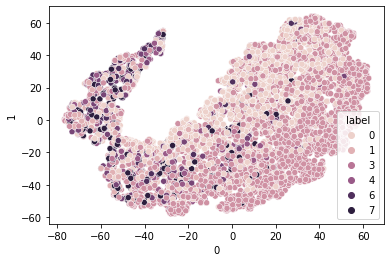

In [25]:
import seaborn as sns
from sklearn.manifold import TSNE
X_embedded = TSNE(n_components=2, learning_rate='auto',
                  init='random').fit_transform(df_embed_transductive)

df_tsne = pd.DataFrame(X_embedded)
df_tsne['label'] = labels
sns.scatterplot(data=df_tsne, x=0, y=1, hue="label")

## Obtendo embeddings indutivamente

In [26]:
nodes_of_sampled = set(list(old_mapping.values()))
nodes_of_fullGraph = set(G.nodes())
starting_nodes = list(nodes_of_fullGraph.difference(nodes_of_sampled))

In [27]:
nodes_of_fullGraph == nodes_of_sampled | nodes_of_fullGraph.difference(nodes_of_sampled)

True

In [28]:
inductive_node_embeddings = dwt.get_inductive_embeddings(G, starting_nodes)
df_embed_inductive = pd.DataFrame.from_dict(inductive_node_embeddings, orient='index')

Random walks - T=0.15s
Walks shape: (76750, 10)


/usr/local/lib/python3.8/dist-packages/walker/preprocessing.py:14: FutureWarning: adjacency_matrix will return a scipy.sparse array instead of a matrix in Networkx 3.0.
  A = nx.adjacency_matrix(G).astype(np.float32)


Building X_paths and X_positions:   0%|          | 0/76750 [00:00<?, ?it/s]

Getting Vectorize Layer ...
Encoding texts ...
2399/2399 [==============================] - 6s 3ms/step


In [29]:
df_embed_inductive.head()

,0,1,2,3,4,5,6,7,8,9,...,22,23,24,25,26,27,28,29,30,31
0,-0.935981,-1.433315,1.215350,-1.867102,1.590138,0.784928,-0.132953,-0.955657,-0.454933,1.598758,...,0.603428,1.130210,-1.174469,1.167414,-1.274658,1.332125,-1.429686,1.336975,-1.225861,0.692177
28,-1.707721,-1.553090,1.252706,-2.507944,2.019848,0.528948,0.387042,-1.415321,-0.521889,1.791855,...,0.693857,0.834720,-0.841302,1.139336,-1.217843,1.132577,-1.466711,1.380064,-1.298250,0.305964
30,-0.636835,-0.818823,0.916375,-1.350171,0.883887,0.603967,-0.173902,-0.355106,-0.364769,1.348097,...,0.646750,1.358225,-1.171135,1.237238,-1.205466,1.270806,-1.186815,1.175338,-1.345583,1.069399
35,-1.504625,-1.223561,1.130566,-2.245783,1.712663,0.399527,0.246386,-1.192153,-0.344827,1.789615,...,0.701151,0.942880,-0.909024,1.199322,-1.259990,1.196013,-1.320984,1.402982,-1.236143,0.463318
45,-0.204920,-1.274590,1.051756,-1.229428,1.026077,0.921157,-0.481524,-0.337023,-0.558082,1.203531,...,0.645289,1.464857,-1.451463,1.368314,-1.218324,1.465037,-1.252088,1.140136,-1.334697,1.189620


In [30]:
np.sum(df_embed_inductive.index == starting_nodes)

1535

In [31]:
df_embed_inductive.shape

(1535, 32)

In [32]:
labels = df.iloc[df_embed_inductive.index].label.to_list()
evaluate(df_embed_inductive, labels)




---> DeepWalk Transformers (classification)
              precision    recall  f1-score   support

           0       0.56      0.56      0.56       154
           1       0.00      0.00      0.00        19
           2       0.60      0.80      0.69       222
           3       0.00      0.00      0.00         2
           4       0.20      0.06      0.09        17
           5       0.25      0.06      0.10        17
           6       0.00      0.00      0.00        12
           7       0.00      0.00      0.00        18

    accuracy                           0.58       461
   macro avg       0.20      0.18      0.18       461
weighted avg       0.49      0.58      0.53       461



/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_

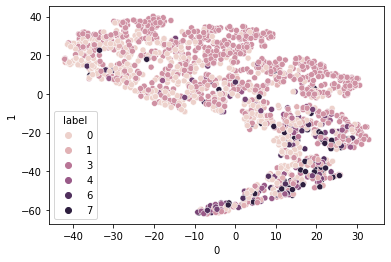

In [33]:
import seaborn as sns
from sklearn.manifold import TSNE
X_embedded = TSNE(n_components=2, learning_rate='auto',
                  init='random').fit_transform(df_embed_inductive)

df_tsne = pd.DataFrame(X_embedded)
df_tsne['label'] = labels
sns.scatterplot(data=df_tsne, x=0, y=1, hue="label")

## Avaliando conjuntamente

In [34]:
df_embed = pd.concat([df_embed_transductive, df_embed_inductive])
df_embed.shape

(7674, 32)

In [35]:
df_embed.head()

,0,1,2,3,4,5,6,7,8,9,...,22,23,24,25,26,27,28,29,30,31
218,-1.051442,-1.642096,1.249266,-1.826281,1.662878,0.830773,-0.056620,-0.951472,-0.599388,1.634280,...,0.618085,0.927083,-1.131289,1.250413,-1.313623,1.226849,-1.449026,1.220322,-1.287996,0.510811
2539,-1.427255,-1.640562,1.306915,-2.120621,1.863404,0.643328,0.054418,-1.172517,-0.617380,1.680684,...,0.686871,1.013291,-0.934406,1.111130,-1.224749,1.256324,-1.440653,1.314759,-1.187190,0.405975
5971,-1.247750,-1.371555,1.217265,-2.030224,1.600393,0.618631,0.147014,-1.069913,-0.442739,1.720125,...,0.633156,1.094770,-1.022854,1.196862,-1.306635,1.239651,-1.420459,1.354112,-1.236835,0.525859
6169,-1.034089,-1.365558,1.193283,-1.781603,1.429738,0.720555,-0.073403,-0.848749,-0.465103,1.602850,...,0.640508,1.130462,-1.050594,1.201238,-1.173495,1.312114,-1.388270,1.212846,-1.281547,0.690366
1237,-1.211931,-1.569089,1.256335,-2.082669,1.779619,0.688695,-0.016369,-1.145512,-0.576433,1.695121,...,0.665042,0.975582,-1.039914,1.190886,-1.228726,1.238232,-1.359458,1.251061,-1.310174,0.553650


In [36]:
set(df_embed.index) == nodes_of_fullGraph

True

In [37]:
labels = df.iloc[df_embed.index].label.to_list()
evaluate(df_embed, labels)




---> DeepWalk Transformers (classification)
              precision    recall  f1-score   support

           0       0.49      0.59      0.54       648
           1       0.17      0.02      0.03       106
           2       0.68      0.82      0.74      1207
           3       0.00      0.00      0.00        23
           4       0.00      0.00      0.00        87
           5       0.18      0.03      0.06        90
           6       0.00      0.00      0.00        50
           7       0.06      0.01      0.02        92

    accuracy                           0.60      2303
   macro avg       0.20      0.19      0.17      2303
weighted avg       0.51      0.60      0.54      2303



/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_

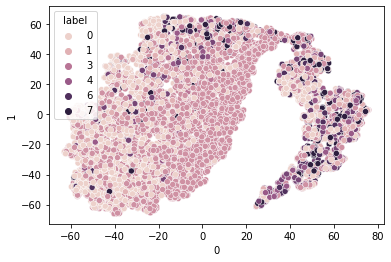

In [38]:
import seaborn as sns
from sklearn.manifold import TSNE
X_embedded = TSNE(n_components=2, learning_rate='auto',
                  init='random').fit_transform(df_embed)

df_tsne = pd.DataFrame(X_embedded)
df_tsne['label'] = labels
sns.scatterplot(data=df_tsne, x=0, y=1, hue="label")